In [42]:
%matplotlib inline


# Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)


In [43]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

### Step 1. Download the dataset
- Download the data
- Find the number of samples, number of features, number of classes

In [44]:
import numpy as np


In [45]:
X, y = lfw_people.data, lfw_people.target
print(f'# of samples = {X.shape[0]}')
print(f'# of features = {X.shape[1]}')
print(f'# of classes = {np.unique(y).size}')

# of samples = 1288
# of features = 1850
# of classes = 7


### Step 2. Train the Model
- Split the data into test and train datasets
- Compute a PCA (eigenfaces) on the face dataset
- Train an SVM Model
- Create a confusion matrix to evaluate the model.

In [46]:
Xtr, Xts, ytr, yts = train_test_split(X, y, stratify=y)

In [47]:
cum_evr = 0
n=6
while cum_evr < .9:
    pca = PCA(n_components=n)
    pca.fit(Xtr)
    cum_evr = pca.explained_variance_ratio_.sum()
    n+=1
print(n)


95


In [48]:
pca = PCA(n_components=96)
pca.fit(Xtr)
print(pca.explained_variance_ratio_)

[0.27695066 0.05993551 0.05559795 0.04465422 0.03769499 0.03196844
 0.02691341 0.02140446 0.01961425 0.01860114 0.01587624 0.01541613
 0.0137555  0.0132316  0.01190786 0.01091274 0.00912718 0.00873334
 0.00849443 0.00815765 0.00787014 0.00749139 0.00719319 0.00623511
 0.00607661 0.00537658 0.00512651 0.00497417 0.00488763 0.00473025
 0.00468022 0.00428924 0.00415395 0.00407698 0.00377304 0.00365885
 0.00358572 0.00344606 0.0031858  0.00315393 0.00307583 0.0029653
 0.00286688 0.00281554 0.00271704 0.00265808 0.00261865 0.00255256
 0.00246642 0.00233745 0.00231277 0.00224527 0.00216344 0.00211305
 0.00208113 0.0020637  0.00200686 0.00197087 0.00190826 0.00188875
 0.00183971 0.00178088 0.00176633 0.00170939 0.00170572 0.00167517
 0.00159001 0.00154822 0.00154121 0.00151241 0.00148259 0.00141804
 0.00139861 0.00137159 0.0013405  0.00132491 0.00131159 0.00129055
 0.00128193 0.0012633  0.00121759 0.0011913  0.00117859 0.00116373
 0.00111539 0.00110252 0.00109908 0.00107043 0.00104608 0.00102

In [49]:
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'gamma': np.logspace(-2, 2, 5)
}

grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True)
grid.fit(pca.fit_transform(Xtr), ytr)

svc = grid.best_estimator_
svc

SVC(C=10.0, gamma=0.01)

[Text(0, 0, 'Ariel Sharon'),
 Text(1, 0, 'Colin Powell'),
 Text(2, 0, 'Donald Rumsfeld'),
 Text(3, 0, 'George W Bush'),
 Text(4, 0, 'Gerhard Schroeder'),
 Text(5, 0, 'Hugo Chavez'),
 Text(6, 0, 'Tony Blair')]

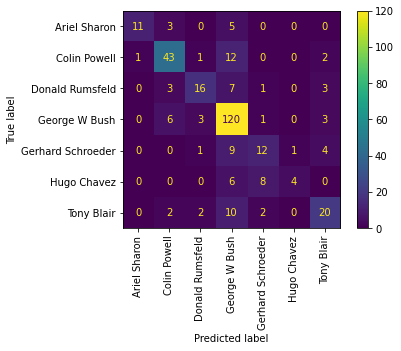

In [50]:
ConfusionMatrixDisplay.from_estimator(svc, pca.transform(Xts), yts, display_labels=lfw_people.target_names)
ax=plt.gca()
ax.set_xticklabels(lfw_people.target_names, rotation=90)